布林线指标，即BOLL指标，其英文全称是“Bollinger Bands”，布林线(BOLL)由约翰 布林先生创造，其利用统计原理，求出股价的标准差及其信赖区间，从而确定股价的波动范围及未来走势，利用波带显示股价的安全高低价位，因而也被称为布林带。其上下限范围不固定，随股价的滚动而变化。布林指标和麦克指标MIKE一样同属路径指标，股价波动在上限和下限的区间之内，这条带状区的宽窄，随着股价波动幅度的大小而变化，股价涨跌幅度加大时，带状区变宽，涨跌幅度狭小盘整时，带状区则变窄。

## 计算公式
* 中轨线=N日的移动平均线
* 上轨线=中轨线+K倍的标准差
* 下轨线=中轨线－K倍的标准差（K为参数，可根据股票的特性来做相应的调整，一般默认为2）
## 使用方法：
* (1) 股价高于这个波动区间，即突破阻力线，说明股价虚高，故卖出*
* (2) 股价低于这个波动区间，即跌破支撑线，说明股价虚低，故买入

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta
import tushare as ts
from matplotlib import rc
# from .talibfunctions import getFontName

import os

FONTNAME = "~/.local/share/fonts/HanyiSentyTang.ttf"
def getFontName(fname=FONTNAME):
    return os.path.expanduser(fname)

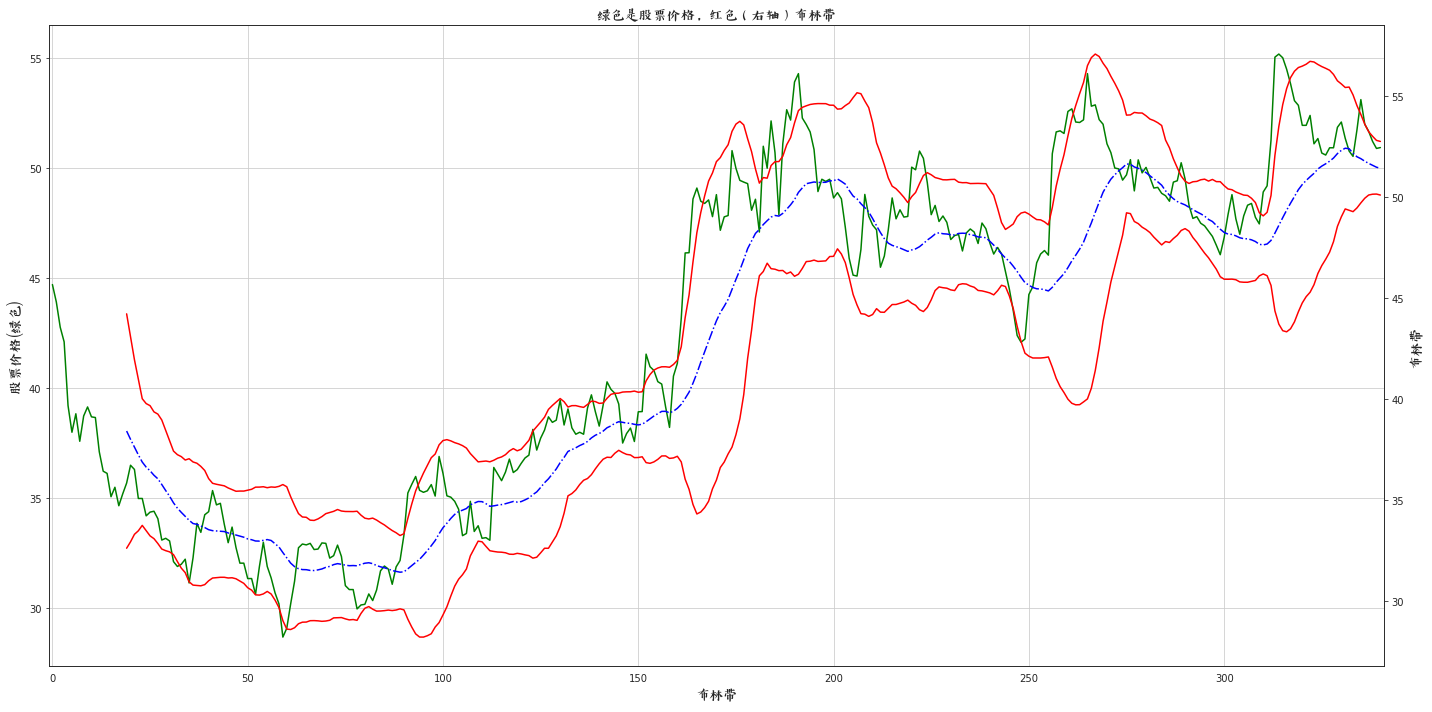

In [6]:
rc('mathtext', default='regular')
sns.set_style('white')
%matplotlib inline
# myfont =mpl.font_manager.FontProperties(fname=r"c:\windows\fonts\simsun.ttc",size=14)
myfont =mpl.font_manager.FontProperties(fname=getFontName(),size=14)
plt.rcParams["figure.figsize"] = (20,10)


dw = ts.get_k_data("600600")
dw = dw[300:]
dw.index = range(len(dw))
dw['upper'], dw['middle'], dw['lower'] = ta.BBANDS(
                dw.close.values, 
                timeperiod=20,
                # number of non-biased standard deviations from the mean
                nbdevup=2,
                nbdevdn=2,
                # Moving average type: simple moving average here
                matype=0)



fig = plt.figure(figsize=(20,10))
fig.set_tight_layout(True)
ax1 = fig.add_subplot(111)
#fig.bar(dw.index, dw.volume, align='center', width=1.0)
ax1.plot(dw.index, dw.close, '-', color='g')

ax2 =ax1.twinx()
ax2.plot(dw.index, dw.upper, '-', color='r')
ax2.plot(dw.index, dw.lower, '-', color='r')
ax2.plot(dw.index, dw.middle, '-.', color='b')

ax1.set_ylabel(u"股票价格(绿色)",fontproperties=myfont, fontsize=16)
ax2.set_ylabel(u"布林带",fontproperties=myfont, fontsize=16)
ax1.set_title(u"绿色是股票价格，红色（右轴）布林带",fontproperties=myfont, fontsize=16)
# plt.xticks(bar_data.index.values, bar_data.barNo.values)
ax1.set_xlabel(u"布林带",fontproperties=myfont,fontsize=16)
ax1.set_xlim(left=-1,right=len(dw))
ax1.grid()